In [2]:
import pandas as pd
import  seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from meteostat import Point, Daily
from sklearn.metrics import classification_report

## Data Loading preview

In [3]:
file_data = 'dataset_SCL.csv'
df_raw = pd.read_csv(file_data, sep=",")
df_raw.head(3).append(df_raw.tail(3))

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68205,2017-12-31 14:55:00,400,SCEL,SPJC,JAT,2017-12-31 15:04:00,400.0,SCEL,SPJC,JAT,31,12,2017,Domingo,I,JetSmart SPA,Santiago,Lima


In [4]:
display(df_raw.describe())
display(df_raw.info())
display(df_raw.isnull().sum())

,DIA,MES,AÑO
count,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029
std,8.782886,3.523321,0.005415
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


None

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

## Visualizations to understand data

### 1. Flight numbers per airline

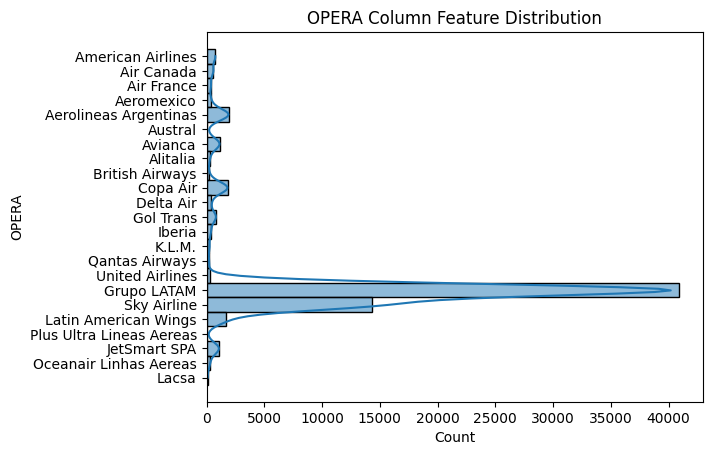

In [5]:
col_visualize = "OPERA"

sns.histplot(df_raw, y=col_visualize, kde=True)
plt.title(col_visualize+ ' Column Feature Distribution')
plt.show()

Its importante double check to this data

In [6]:
display(df_raw[col_visualize].value_counts())

Grupo LATAM                 40892
Sky Airline                 14298
Aerolineas Argentinas        1949
Copa Air                     1850
Latin American Wings         1674
Avianca                      1152
JetSmart SPA                 1095
Gol Trans                     806
American Airlines             757
Air Canada                    565
Iberia                        362
Delta Air                     358
Air France                    358
Aeromexico                    351
United Airlines               335
Oceanair Linhas Aereas        279
Alitalia                      259
K.L.M.                        251
British Airways               205
Qantas Airways                195
Lacsa                          92
Austral                        74
Plus Ultra Lineas Aereas       49
Name: OPERA, dtype: int64

It is clear that there are more flights and therefore more records of two airlines. This will cause independent of what predictive model we use, these airlines are key to achieving a prediction.
Therefore the question to ask now:

¿What impact do these airlines have in terms of arrears of their flights?

### 2. Flight Type Distribution

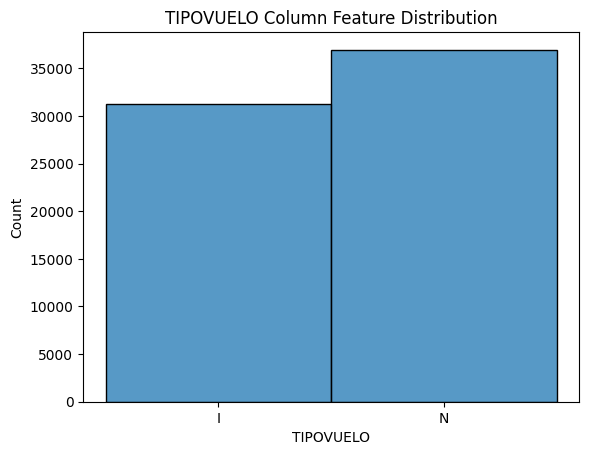

In [7]:
col_visualize = "TIPOVUELO"

sns.histplot(df_raw, x=col_visualize)
plt.title(col_visualize+ ' Column Feature Distribution')
plt.show()

A very large significance is not appreciated in terms of amount of data for national and international flights

### 3. Types of flights with airlines

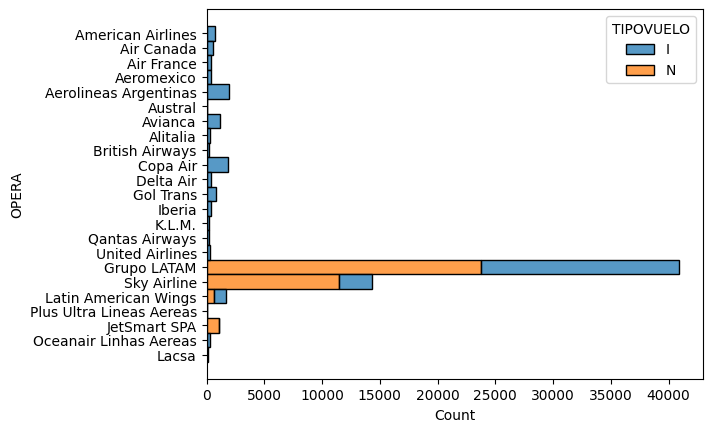

In [8]:
col_visualize = ["OPERA","TIPOVUELO"]
sns.histplot(data=df_raw, y="OPERA", hue="TIPOVUELO", multiple="stack")
plt.show()

#### 4. Visualize OPERA v/s month

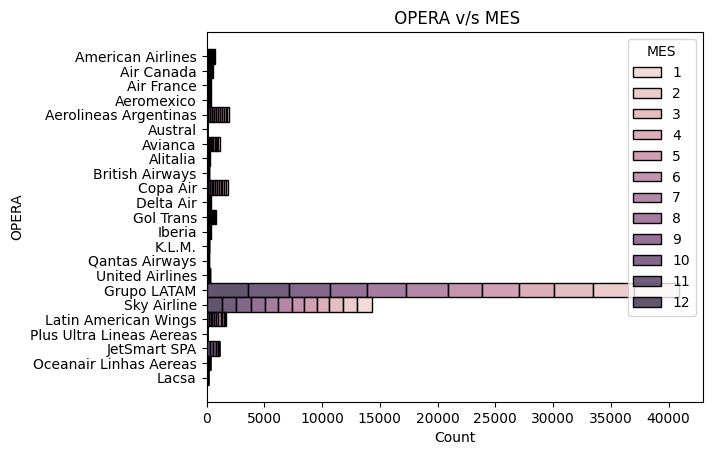

In [9]:
sns.histplot(data=df_raw, y="OPERA", hue="MES", multiple="stack")
plt.title(' OPERA v/s MES')
plt.show()

#### 5. Visualize OPERA v/s Day of flight

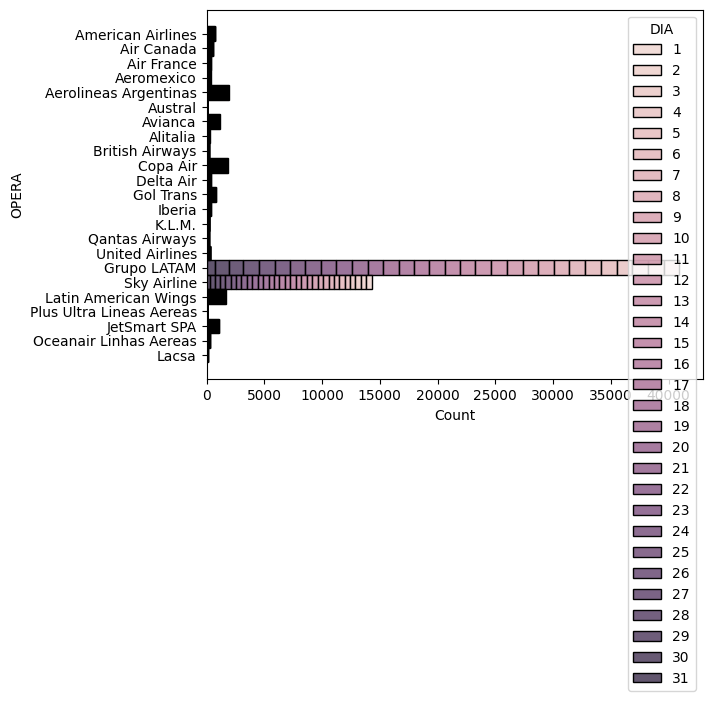

In [10]:
sns.histplot(data=df_raw, y="OPERA", hue="DIA", multiple="stack")
plt.show()

#### 5. Visualize OPERA v/s Des-I

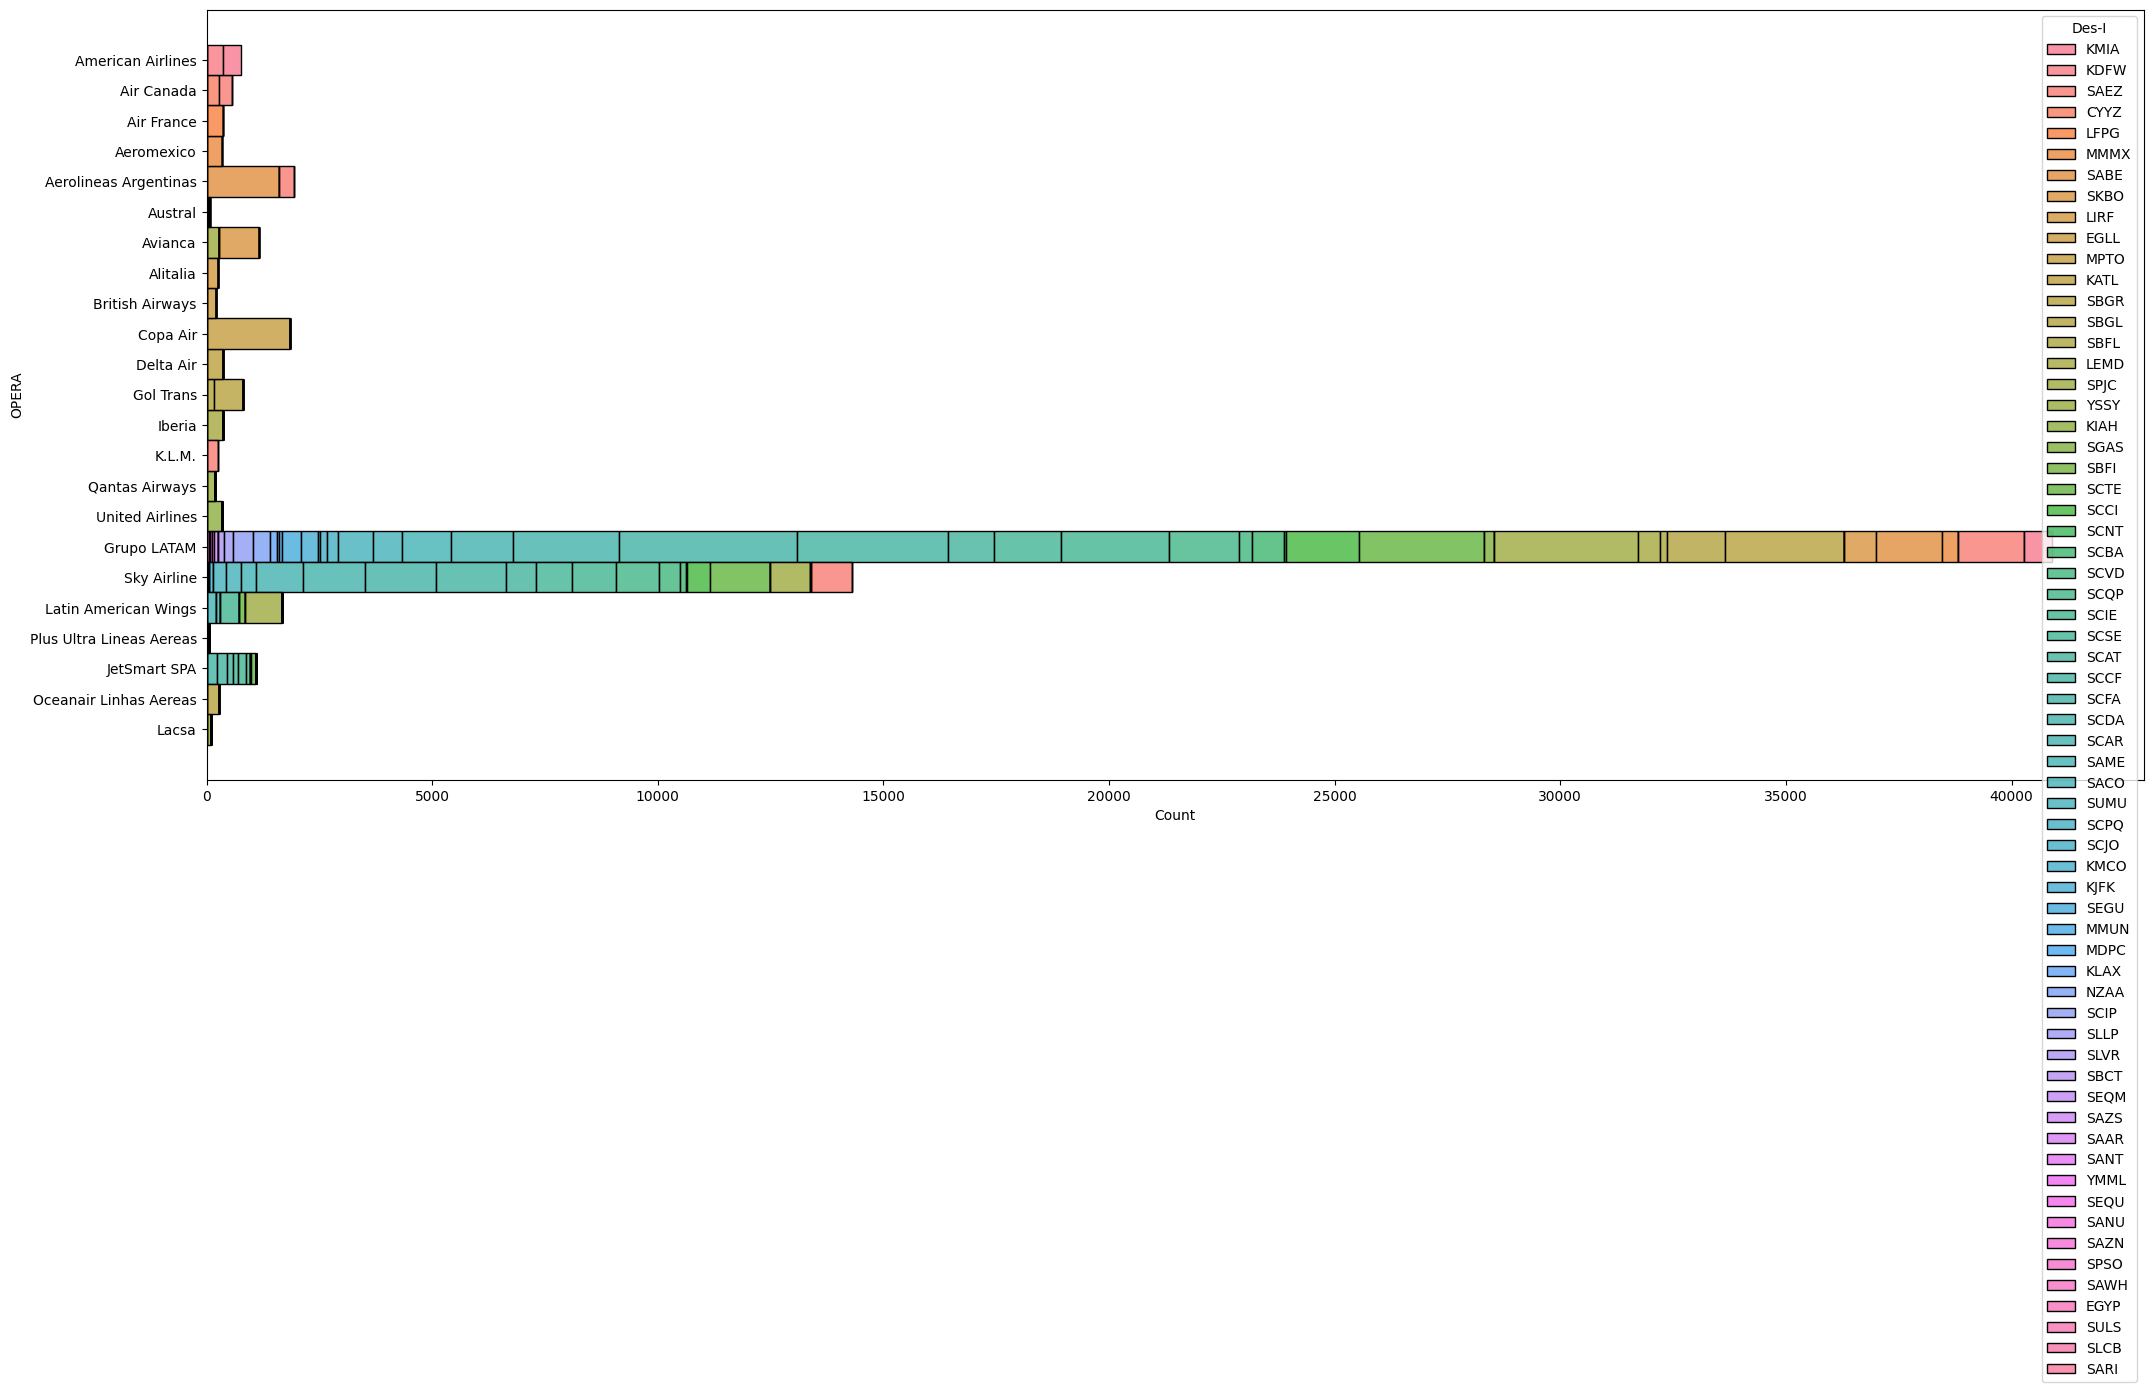

In [11]:
fig, ax = plt.subplots(figsize=(25,10))
sns.histplot(ax=ax,data=df_raw, y="OPERA", hue="Des-I", multiple="stack")
plt.show()

#### 5. Visualize OPERA v/s DIANOM

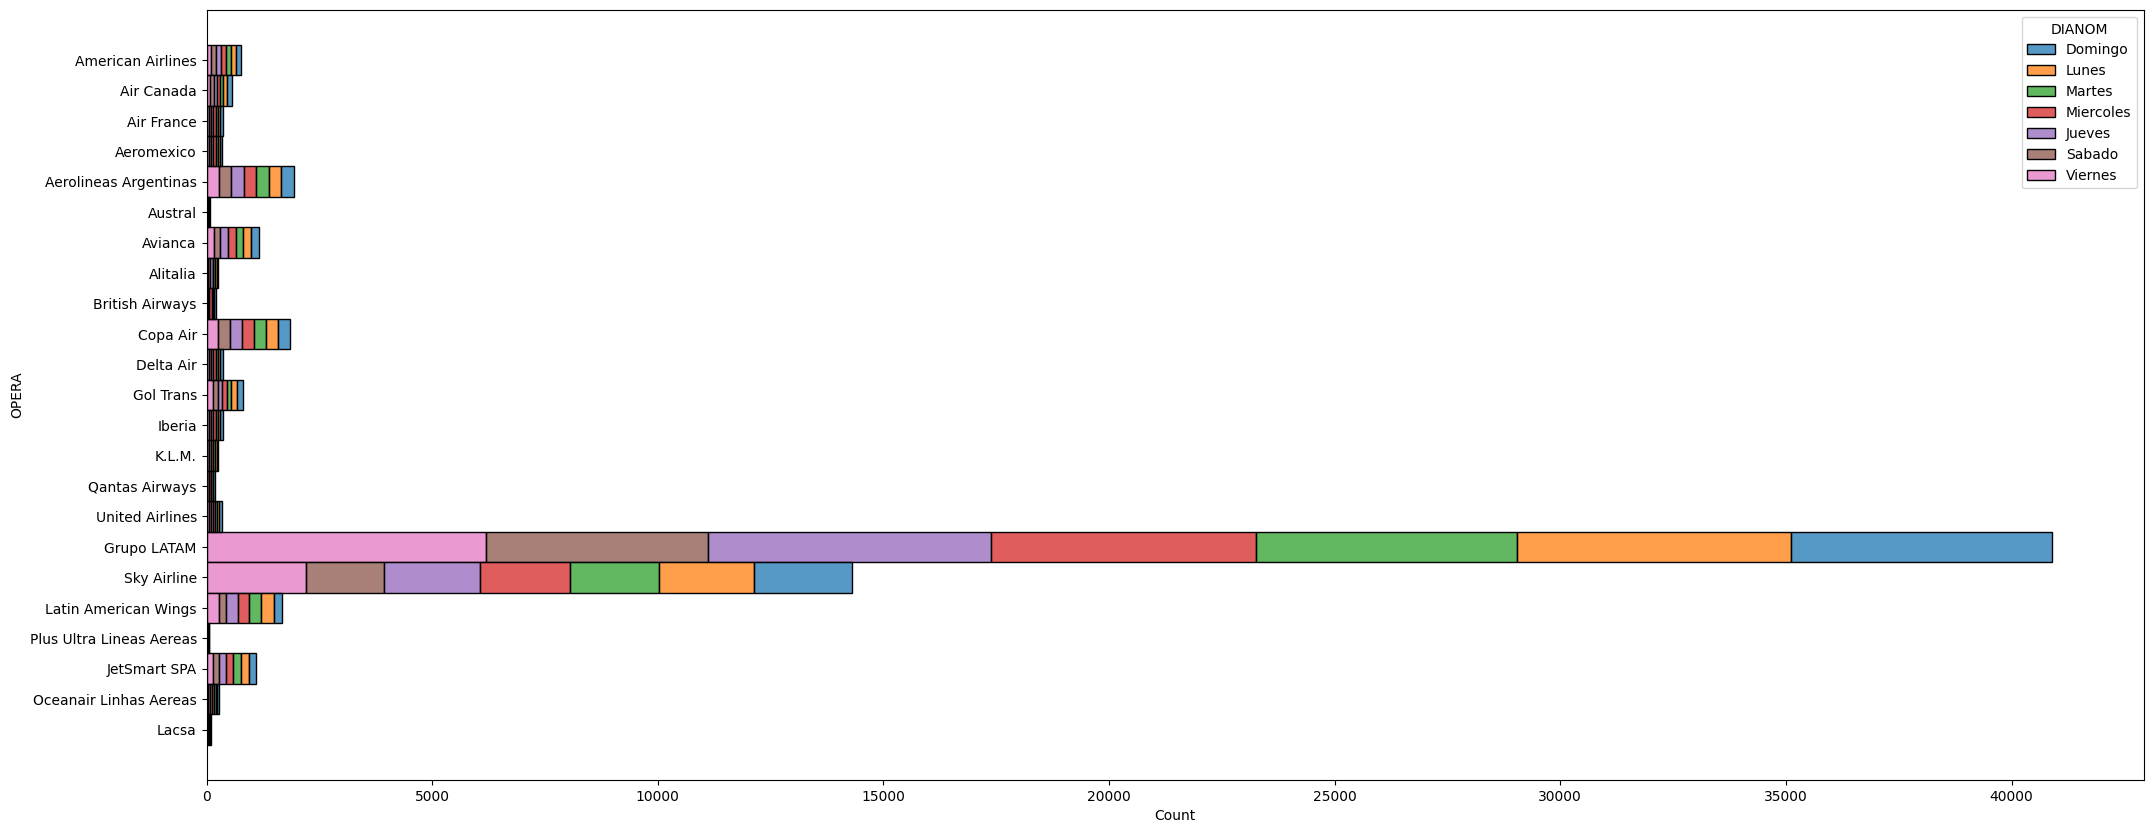

In [12]:
fig, ax = plt.subplots(figsize=(25,10))
sns.histplot(ax=ax,data=df_raw, y="OPERA", hue="DIANOM", multiple="stack")
plt.show()

#### Conclusions
1. There is a clear imbalance in the data and they will be biased by the data provided by the LATAM GROUP airline, so the delay behavior will be characterized by this airline.
For this reason, the distribution of data around OPERA continues to be displayed.

    1.1 Considering the airlines GRUPO LATAM and SKY AIRLINES, it can be seen that most of the flights are domestic and will have an impact on the characterization of the behavior of flight delays.

    1.2 There is a large amount of data with a destination flight with a component of its first two initials SC, which correspond to flights to Chile.
    
    1.3 It is seen that the days of operation of the flights are balanced between the different airlines.

2. Now, by generating the variable of interest delay_15 we will be able to verify the direct or indirect relationship of the data with flight delays, for which reason new conclusions will be made later.

### Creation of flight delay feature

1. #### Before we will validate the data types to have a correct transformation of the data

In [13]:
# Define the data types for each column
dtypes= {"Vlo-I":"int", "Ori-I":"str", "Des-I":"str","Emp-I":"str","Vlo-O":"int","Ori-O":"str","Des-O":"str","Emp-O":"str","DIA":"int",
"MES":"int","AÑO":"int", "DIANOM":"str", "TIPOVUELO":"str", "OPERA":"str", "SIGLAORI":"str", "SIGLADES":"str"}

try:
    df_raw = df_raw.astype(dtypes)
except ValueError as e:
    print(e)
#This error is because the column Vlo-I has a value that is not a number, so we have to remove it

invalid literal for int() with base 10: '989P'


There are mislabeled data, for that reason they are deleted

Get the data types int and the transform to numeric with errors = 'coerce' to convert the values that are not numeric to NaN, by
#example the value 989P that is not a number

In [14]:
columns_int = [k for k, v in dtypes.items() if v == 'int']
df_raw[columns_int] = df_raw[columns_int].apply(pd.to_numeric, errors='coerce')

We will check the rows with NaN values and remove them

In [15]:
df_raw[df_raw.isna().any(axis=1)].head(3)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200.0,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima
13906,2017-03-30 10:30:00,71.0,SCEL,SCIE,SKU,2017-03-30 10:50:00,NaN,SCEL,SCIE,SKU,30,3,2017,Jueves,N,Sky Airline,Santiago,Concepcion
13907,2017-03-22 11:00:00,1071.0,SCEL,SCIE,SKU,2017-03-22 11:00:00,NaN,SCEL,SCIE,SKU,22,3,2017,Miercoles,N,Sky Airline,Santiago,Concepcion


Now we can transform the features date to datetime, that will help us to work with them with errors = 'coerce' to convert the values that are not numeric to NaN, by


In [16]:
cols_date= ["Fecha-I", "Fecha-O"]
df_raw[cols_date] = df_raw[cols_date].apply(pd.to_datetime, errors='coerce')

Now remove the rows with NaN values and convert the columns to the correct data type 

In [17]:
df_raw = df_raw.dropna()
df_raw = df_raw.astype(dtypes)

In [18]:
df_raw.head(3).append(df_raw.tail(3))
df_raw.shape

(68185, 18)

The logic requested between dates is applied, for that reason, having transformed it to datetime has an advantage.
The special case of December and March is handled considering that December is the last month of the year and there will be nothing greater than that and considering the months before March.
Another way to do it was to use the columns of months, days, year delivered in the data.
All constraints are used under a mask and then a simple assignment.

In [19]:
mask = (((df_raw['Fecha-I'].dt.strftime('%m-%d') >= "12-15") | (df_raw['Fecha-I'].dt.strftime('%m-%d') <= "03-03")) |
        ((df_raw['Fecha-I'].dt.strftime('%m-%d') >= "07-15") & (df_raw['Fecha-I'].dt.strftime('%m-%d') <= "07-31")) |
        ((df_raw['Fecha-I'].dt.strftime('%m-%d') >= "09-11") & (df_raw['Fecha-I'].dt.strftime('%m-%d') <= "09-30")) 
        )
df_raw.loc[mask, "temporada_alta"]  = 1
df_raw.loc[~mask,"temporada_alta"]  = 0

Now we must verify if the mask is well applied and for this we have that the months considered as high season should be = [1,2,3,7,9,12] and the same with the days in each month.

In [20]:
df_raw.loc[df_raw['temporada_alta'] == 1]['Fecha-I'].dt.month.unique()

array([ 1,  2,  3,  7,  9, 12])

#### 2. Create feature dif_min

In [21]:
df_raw = df_raw.assign(dif_min = (df_raw['Fecha-O'] - df_raw['Fecha-I']).astype('timedelta64[m]'))

We verify the difference in minutes taking a sample and verifying that it is correct

In [22]:
df_raw.head(3).append(df_raw.tail(3))

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,1.0,3.0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,1.0,9.0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,1.0,9.0
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1.0,40.0
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1.0,13.0
68205,2017-12-31 14:55:00,400,SCEL,SPJC,JAT,2017-12-31 15:04:00,400,SCEL,SPJC,JAT,31,12,2017,Domingo,I,JetSmart SPA,Santiago,Lima,1.0,9.0


#### 3. Create feature atraso_15

The logic is simple, by means of an appty specify the delay cunplimiento conditions with the limit_delay variable and assign it to the new delay variable

In [23]:
limit_delay= 15
df_raw["atraso_15"] = df_raw["dif_min"].apply(lambda x: 1 if x > limit_delay else 0)

Verify the result

In [24]:
df_raw.loc[df_raw['atraso_15'] == 1].head(3)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15
5,2017-01-06 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 00:04:00,226,SCEL,KMIA,AAL,...,1,2017,Sabado,I,American Airlines,Santiago,Miami,1.0,34.0,1
8,2017-01-09 23:30:00,226,SCEL,KMIA,AAL,2017-01-10 00:10:00,226,SCEL,KMIA,AAL,...,1,2017,Martes,I,American Airlines,Santiago,Miami,1.0,40.0,1
9,2017-01-11 23:30:00,226,SCEL,KMIA,AAL,2017-01-12 00:39:00,226,SCEL,KMIA,AAL,...,1,2017,Jueves,I,American Airlines,Santiago,Miami,1.0,69.0,1


#### 4. Create feature periodo_dia

Like above, we create masks considering the time at HH: mm and then we only apply the restrictions and wee in a dictionary to be able to dynamically apply them

In [25]:
mask_morning    = ((df_raw['Fecha-I'].dt.strftime('%H:%M') >= "05:00") & (df_raw['Fecha-I'].dt.strftime('%H:%M') <= "11:59")) 
mask_afternoon  = ((df_raw['Fecha-I'].dt.strftime('%H:%M') >= "12:00") & (df_raw['Fecha-I'].dt.strftime('%H:%M') <= "18:59")) 
mask_night      = ((df_raw['Fecha-I'].dt.strftime('%H:%M') >= "19:00") | (df_raw['Fecha-I'].dt.strftime('%H:%M') <= "04:59")) 

for key, mask in {"mañana": mask_morning, "tarde":mask_afternoon, "noche":mask_night}.items():
    df_raw.loc[mask, "periodo_dia"]  = key

We verify what is done

In [26]:
df_raw.head(3).append(df_raw.tail(3))

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,1.0,3.0,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1.0,9.0,0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1.0,9.0,0,noche
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400,SCEL,SPJC,JAT,...,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1.0,40.0,1,tarde
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1.0,13.0,0,tarde
68205,2017-12-31 14:55:00,400,SCEL,SPJC,JAT,2017-12-31 15:04:00,400,SCEL,SPJC,JAT,...,2017,Domingo,I,JetSmart SPA,Santiago,Lima,1.0,9.0,0,tarde


In [27]:
file_data_syntetic = 'synthetic_features.csv'
df_raw.to_csv(file_data_syntetic, index=False, sep=',')

### Visualization of Feature Engineer Results

The graphs to be displayed are separated to identify the relationship between the delay rate and the different features.
The delay rate should be calculated as the amount of delays on the data filtered by the feature. A simple way to determine it is using the help of value_counts() which gives us the quantified data from now on and by means of the normalize parameter it gives us the already determined percentages. Then it is enough to rearrange them and iterate through each feature and visualize it

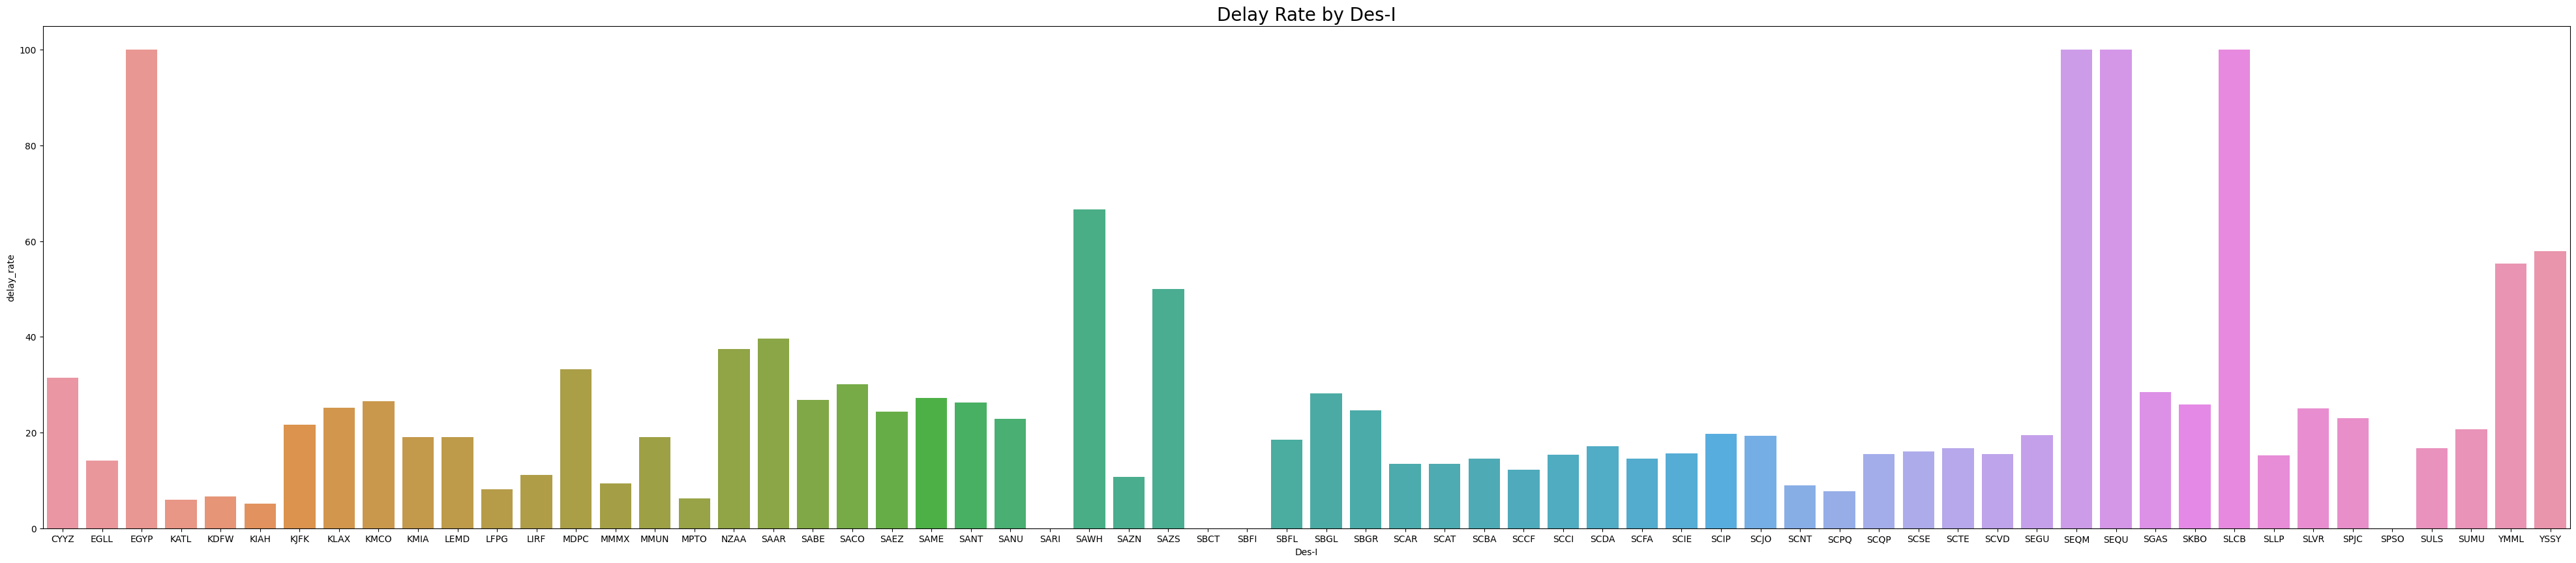

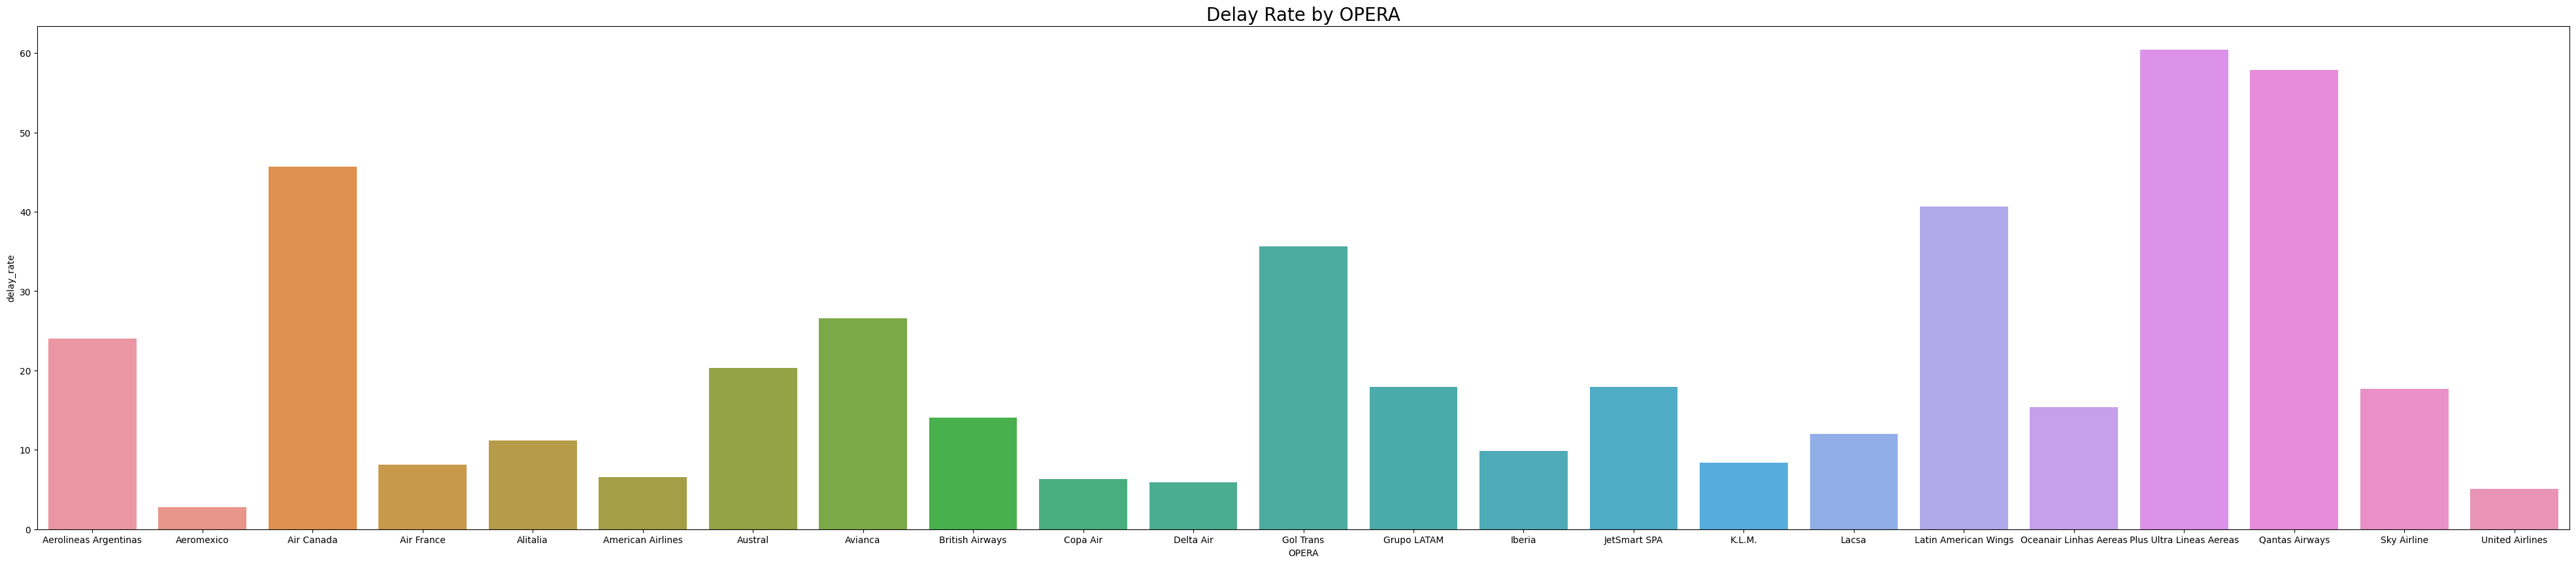

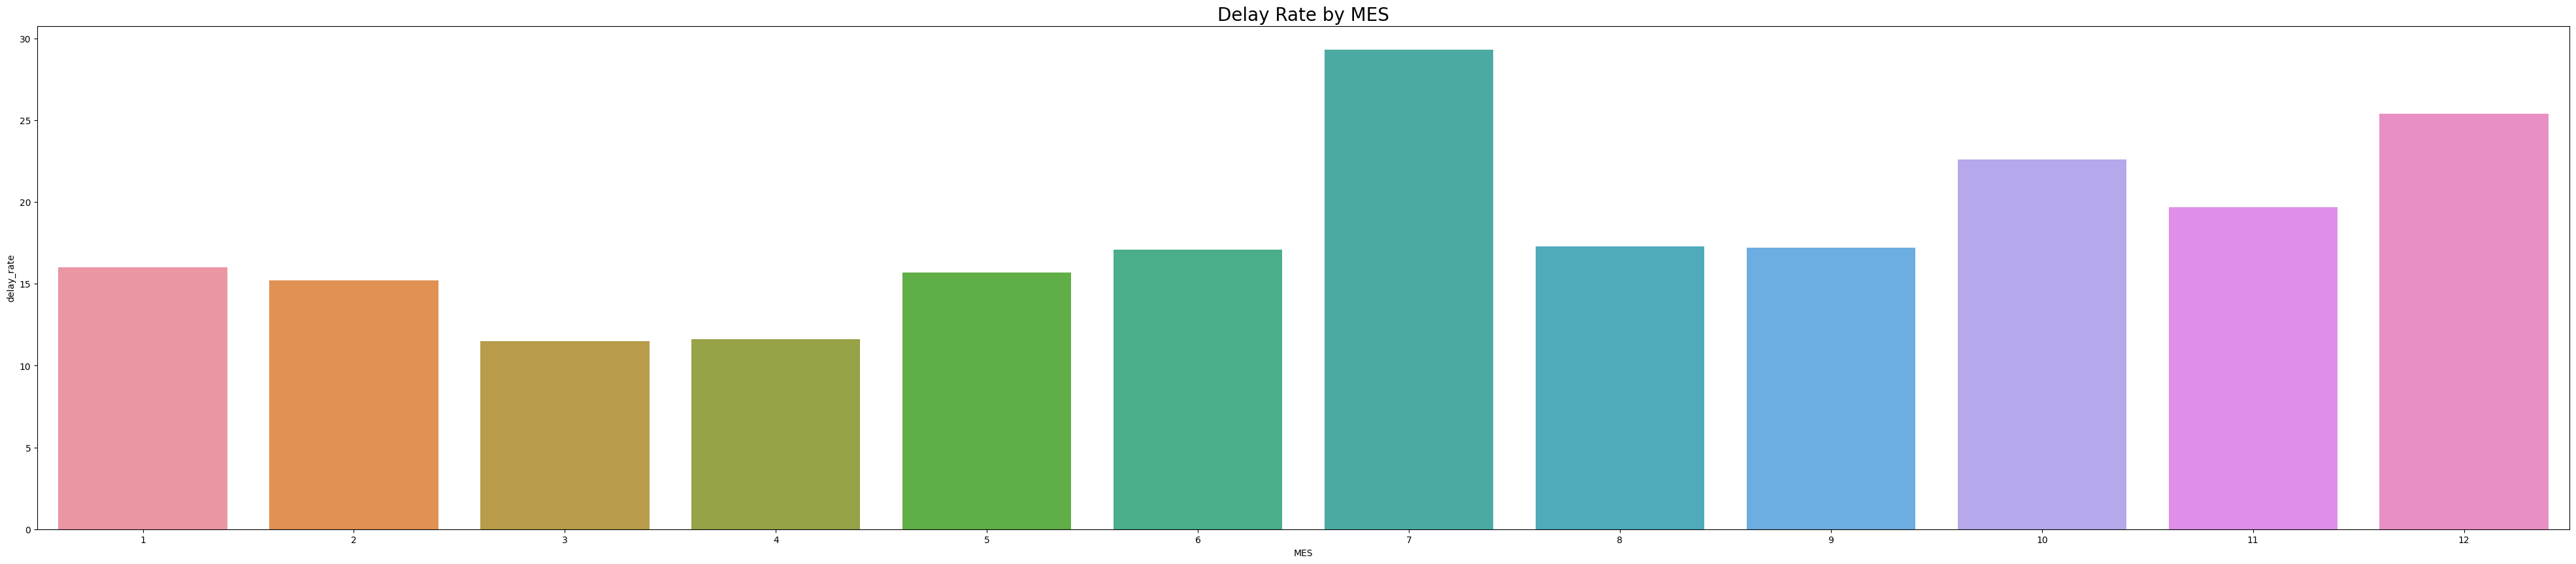

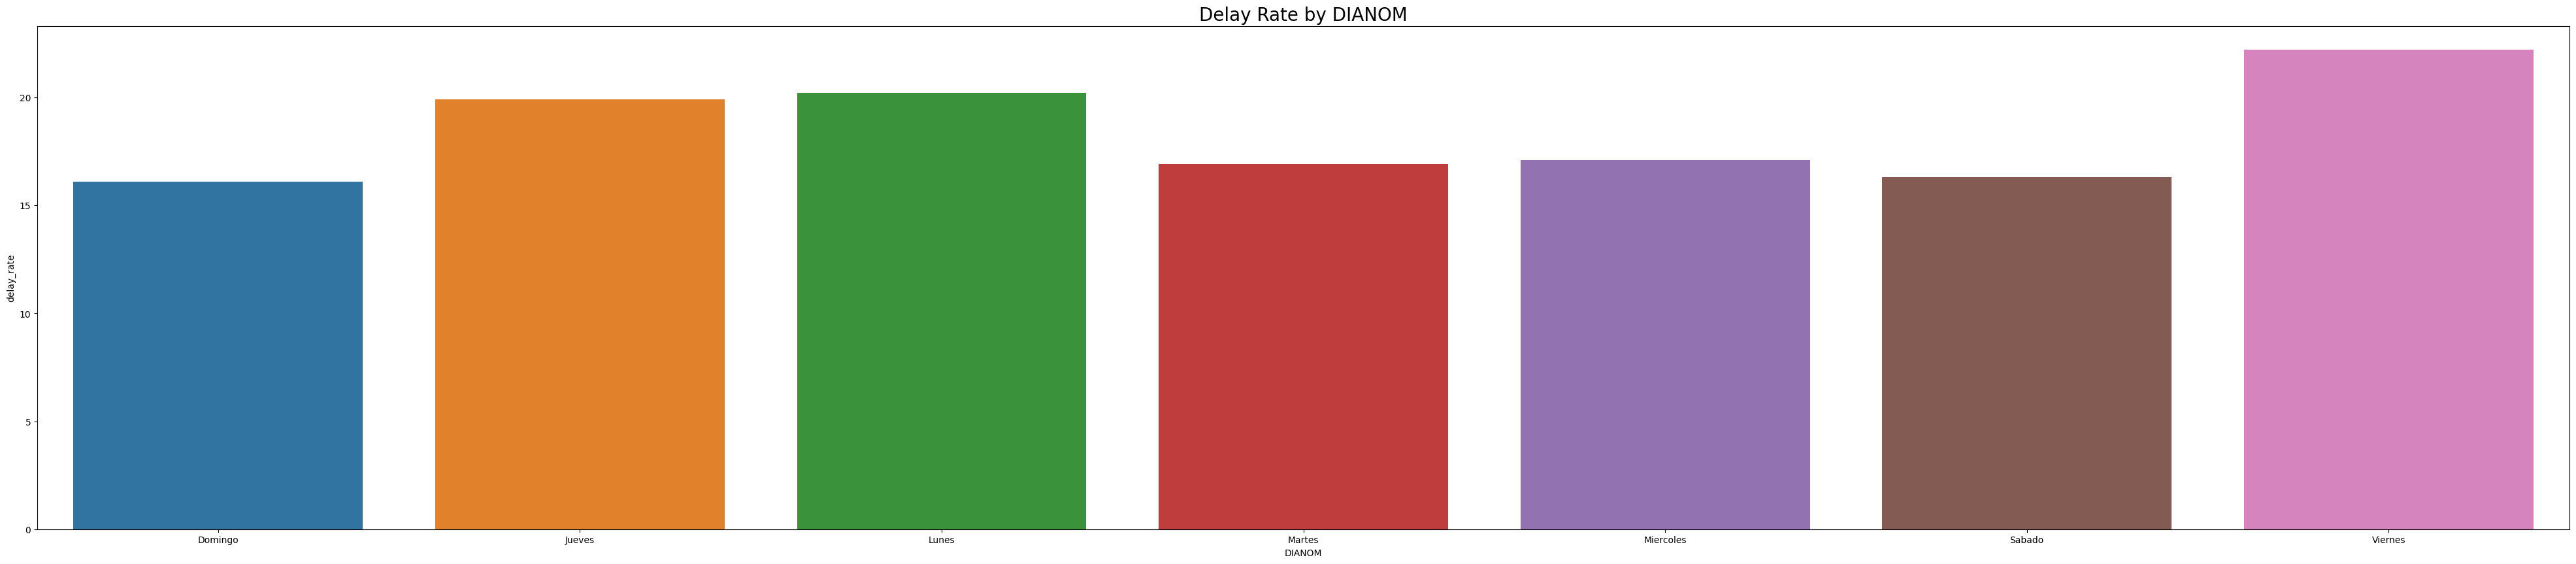

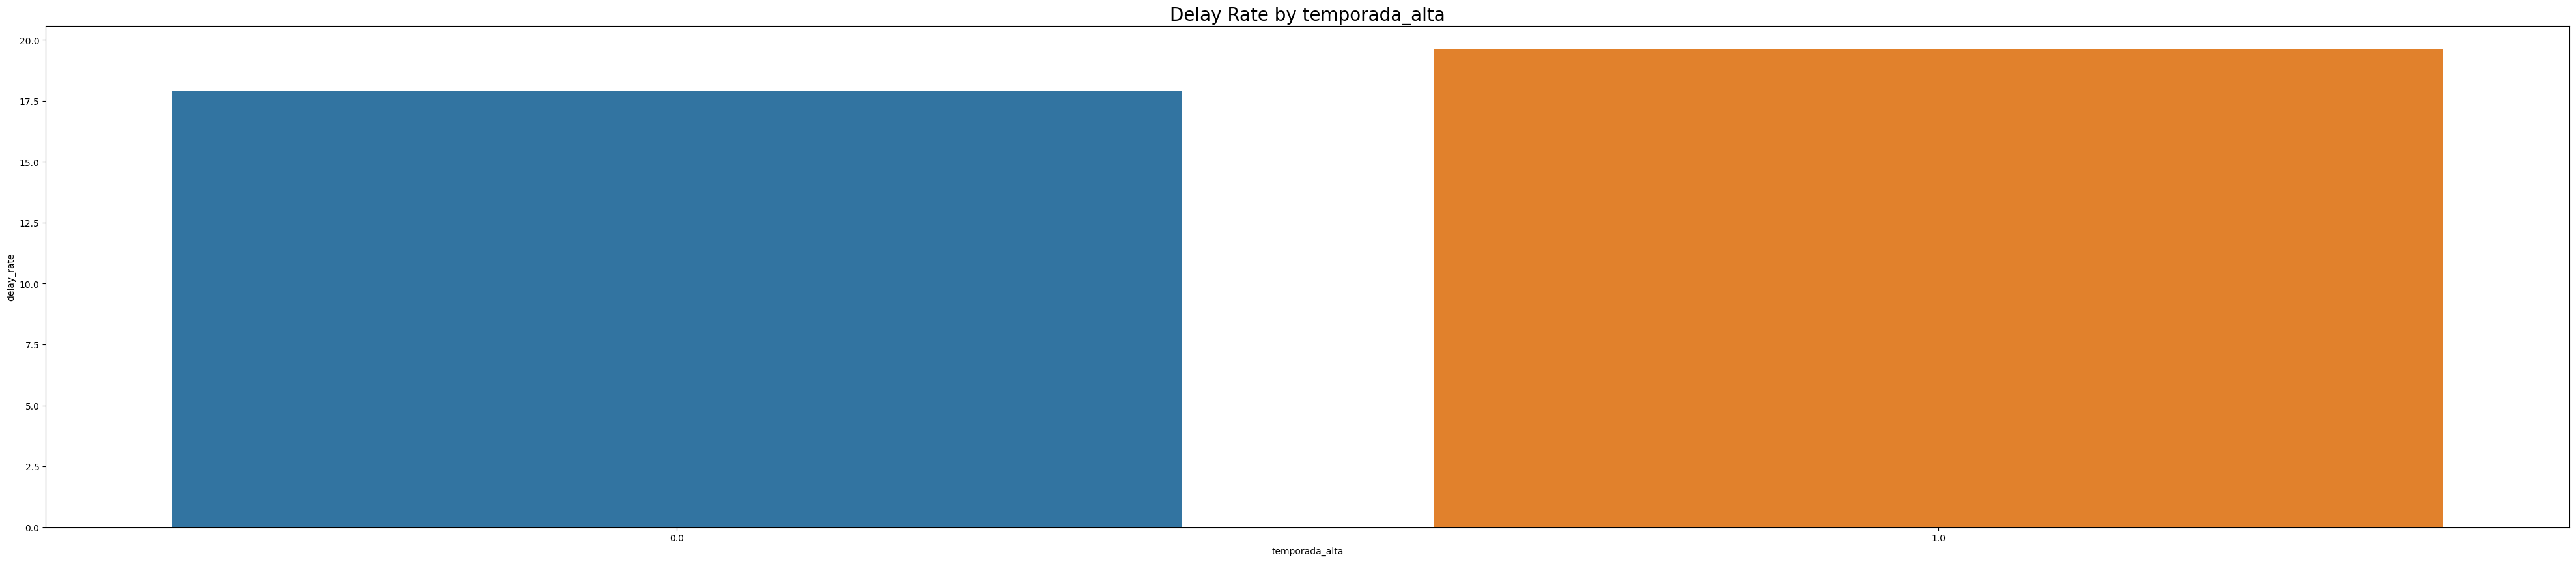

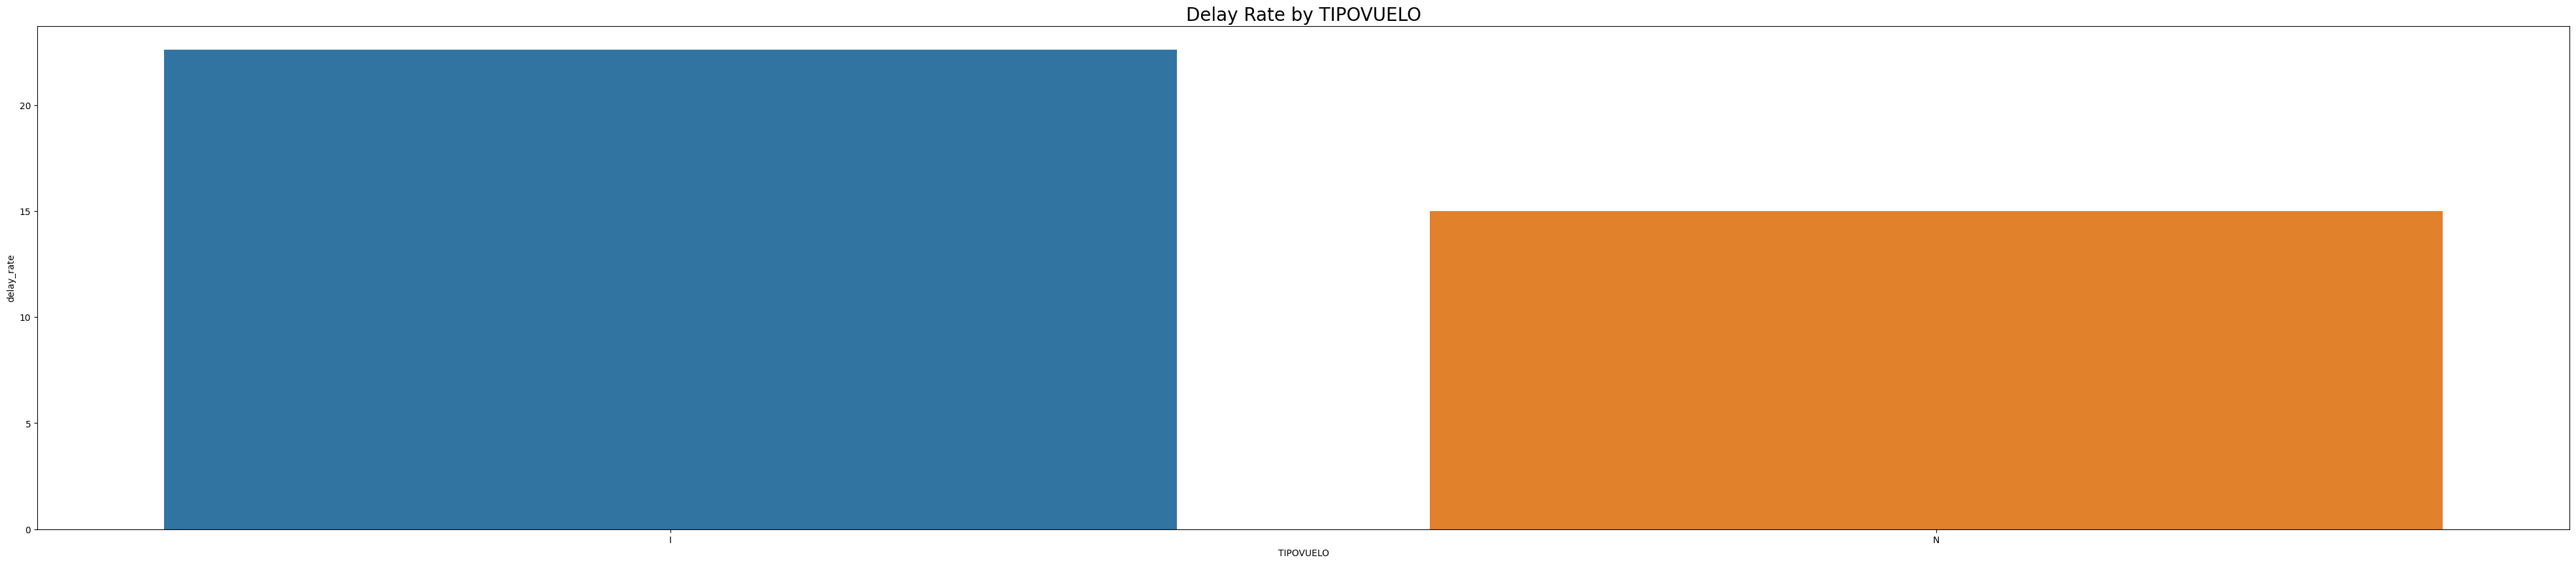

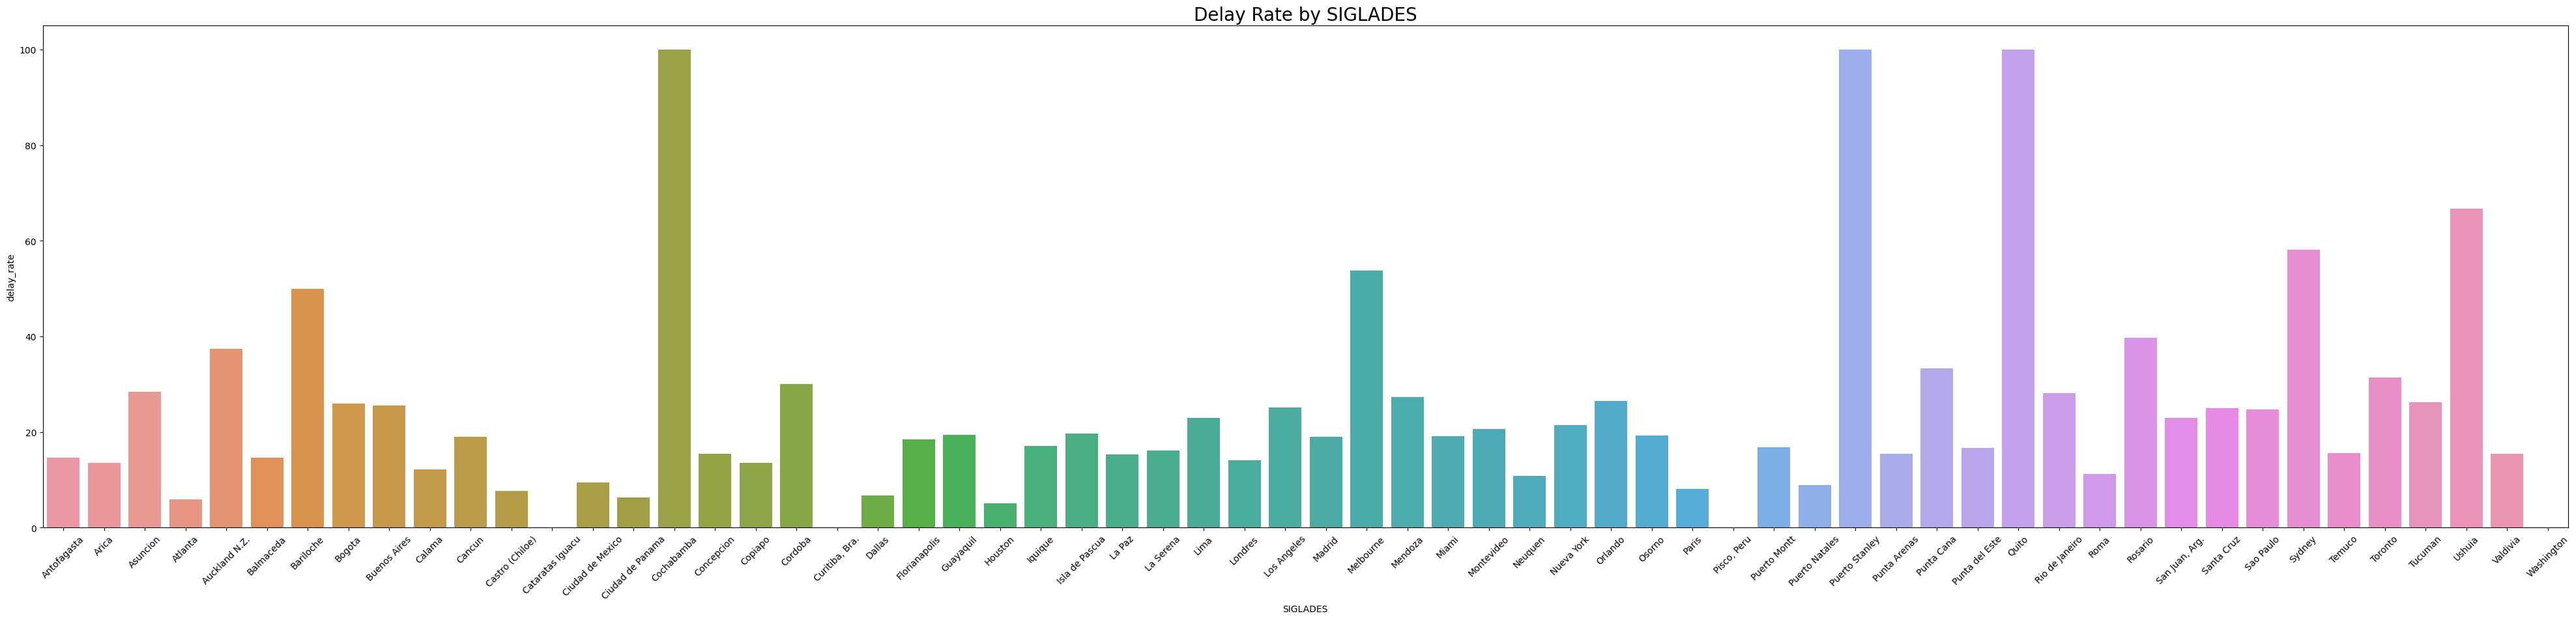

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_group = ["Des-I","OPERA","MES","DIANOM","temporada_alta","TIPOVUELO", "SIGLADES"]
for col in cols_group:
    df_delay_rate = df_raw.groupby(col)["atraso_15"].value_counts(normalize=True).multiply(100).round(1).unstack(level=1).reset_index()[[col,1]].rename(columns={1:'delay_rate'})
    
    fig, ax = plt.subplots(figsize=(50, 10))
    if col == "SIGLADES":
        plt.xticks(rotation=45)
    ax.set_title("Delay Rate by " + col, fontsize=20)
    sns.barplot(x=col, y="delay_rate", data=df_delay_rate, ax=ax)
    plt.show()

<AxesSubplot:title={'center':'atraso_15 Distrrbution'}, xlabel='atraso_15', ylabel='Count'>

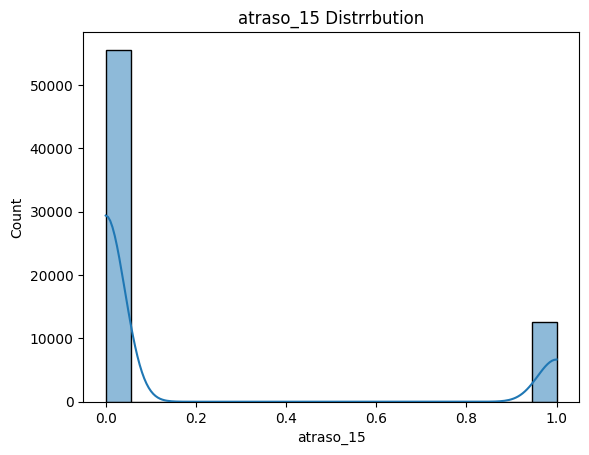

In [29]:
df_raw
fig, ax = plt.subplots()
ax.set_title("atraso_15 Distrrbution")
sns.histplot(x="atraso_15", data=df_raw, ax=ax, kde=True)

#### Conclusions
0. The data is clearly and expectedly unbalanced, favoring the lowest number of delay occurrences.
1. The rate of delay_15 is high in different destinations, some is because they record little data, so the mean is affected.
1.1 The destination of SAWH, SAZN [SA] Argentina, followed by SEQM, SEQE, which are the flights to [SE] Ecuador, followed by SLCB [SL] Bolivia, then SLCB [SL] Colombia, YMML, YSS [Y] Australia.
2. The rate of arrears_15 is increased in the month of July.
3. The rate of delay_15 is increased in international flights, which would be predictable due to the distance.
4. The cities with the highest late_15 rate are:
Cochabamba, Puerto Stanley, Quito, Ushuia, Sydney, Melbourne.

Therefore, the country, city of destination directly influences the rate of delay_15 that exists, therefore it is important to include more information about the destination in the data.